# Liquor Sales short analysis

**First task of the project is to find the best selling locations using zip-codes (2016-2019)**

- for this, the database needed to be created in SQL, then filtered to ony show results between 2016 and 2019 and finally exported to a CSV, so here is my approach


In [1]:
"""
CREATE DATABASE  IF NOT EXISTS `liquorSales`;
USE `liquorSales`;
DROP TABLE IF EXISTS `finance_liquor_sales`;
CREATE TABLE `finance_liquor_sales` (
  `invoice_and_item_number` text,
  `date` datetime DEFAULT NULL,
  `store_number` int DEFAULT NULL,
  `store_name` text,
  `address` text,
  `city` text,
  `zip_code` text,
  `store_location` text,
  `county_number` int DEFAULT NULL,
  `county` text,
  `category` double DEFAULT NULL,
  `category_name` text,
  `vendor_number` int DEFAULT NULL,
  `vendor_name` text,
  `item_number` int DEFAULT NULL,
  `item_description` text,
  `pack` int DEFAULT NULL,
  `bottle_volume_ml` int DEFAULT NULL,
  `state_bottle_cost` double DEFAULT NULL,
  `state_bottle_retail` double DEFAULT NULL,
  `bottles_sold` int DEFAULT NULL,
  `sale_dollars` double DEFAULT NULL,
  `volume_sold_liters` double DEFAULT NULL,
  `volume_sold_gallons` double DEFAULT NULL
  )
INSERT INTO `finance_liquor_sales` VALUES (...) 

SELECT * 
FROM finance_liquor_sales
WHERE YEAR(DATE) BETWEEN 2016 AND 2019;

"""

'\nCREATE DATABASE  IF NOT EXISTS `liquorSales`;\nUSE `liquorSales`;\nDROP TABLE IF EXISTS `finance_liquor_sales`;\nCREATE TABLE `finance_liquor_sales` (\n  `invoice_and_item_number` text,\n  `date` datetime DEFAULT NULL,\n  `store_number` int DEFAULT NULL,\n  `store_name` text,\n  `address` text,\n  `city` text,\n  `zip_code` text,\n  `store_location` text,\n  `county_number` int DEFAULT NULL,\n  `county` text,\n  `category` double DEFAULT NULL,\n  `category_name` text,\n  `vendor_number` int DEFAULT NULL,\n  `vendor_name` text,\n  `item_number` int DEFAULT NULL,\n  `item_description` text,\n  `pack` int DEFAULT NULL,\n  `bottle_volume_ml` int DEFAULT NULL,\n  `state_bottle_cost` double DEFAULT NULL,\n  `state_bottle_retail` double DEFAULT NULL,\n  `bottles_sold` int DEFAULT NULL,\n  `sale_dollars` double DEFAULT NULL,\n  `volume_sold_liters` double DEFAULT NULL,\n  `volume_sold_gallons` double DEFAULT NULL\n  )\nINSERT INTO `finance_liquor_sales` VALUES (...) \n\nSELECT * \nFROM fina

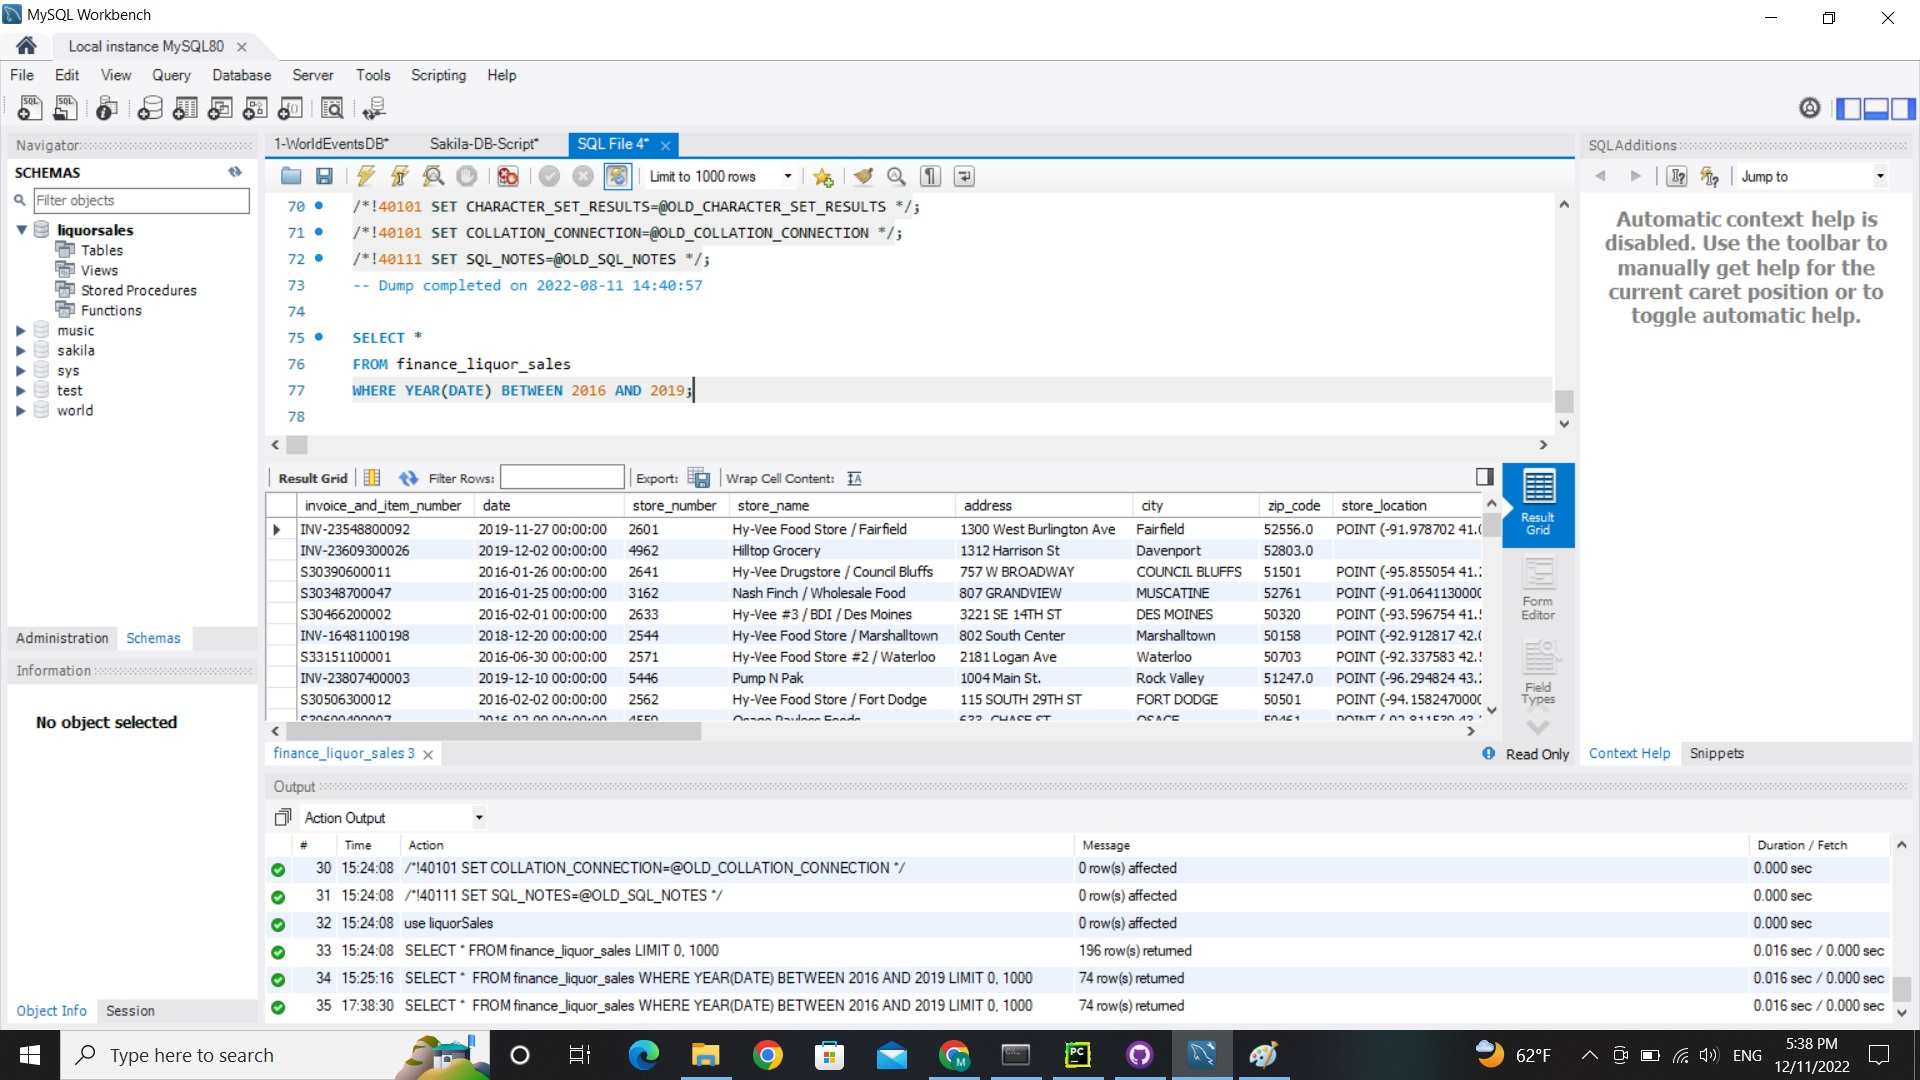

- For time saving reasons I didn't copy all the code from MySQL since some implementation of the database to the SQL server is not my personal work

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import and open the .csv file

df = pd.read_csv('LiquorSales_2016_2019.csv')
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,INV-00002300008,2016-08-29 00:00:00,5244,The Ox & Wren Spirits and Gifts,708 2nd AVE SE,Cresco,52136.0,POINT (-92.106529 43.371131),45,HOWARD,...,35917,Five O'clock Vodka,12,1000,4.17,6.26,2,75.12,2.00,0.52
70,INV-24116900112,2019-12-23 00:00:00,2670,Hy-Vee Food Store / Coralville,2004 8th St,Coralville,52241.0,POINT (-91.591868 41.682337000000004),52,JOHNSON,...,65750,Maestro Agavero Gold,12,1000,7.00,10.50,48,504.00,48.00,12.68
71,INV-08495400086,2017-11-07 00:00:00,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001.0,POINT (-90.668138 42.504959),31,DUBUQUE,...,67557,Kamora Coffee Liqueur,12,1000,8.39,12.59,4,50.36,4.00,1.06
72,INV-08632500071,2017-11-14 00:00:00,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402.0,POINT (-91.67969 42.031819),57,LINN,...,86390,Montezuma Triple Sec,12,1000,2.13,3.20,216,691.20,216.00,57.06


In [4]:
"""Time to analyse the dataset before doing any work"""
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,3706.472973,51185.756757,51.445946,1.114542e+06,287.486486,117115.635135,14.175676,756.756757,7.829865,11.746622,76.148649,827.921351,72.226622,19.078514
std,1193.348520,900.102564,29.430737,1.838894e+05,162.181975,227020.971218,8.235170,413.602145,6.413200,9.619979,157.586478,1429.173301,165.173543,43.633755
min,2178.000000,50010.000000,3.000000,1.011500e+06,35.000000,168.000000,3.000000,50.000000,0.890000,1.340000,1.000000,6.750000,0.200000,0.050000
25%,2616.750000,50320.000000,23.500000,1.052100e+06,77.500000,43031.000000,12.000000,375.000000,4.255000,6.382500,5.000000,46.102500,4.000000,1.060000
50%,3536.500000,50754.000000,57.000000,1.081100e+06,370.000000,60971.500000,12.000000,750.000000,5.730000,8.595000,24.000000,206.640000,7.800000,2.060000
75%,4761.500000,52163.000000,77.000000,1.081650e+06,421.000000,82682.000000,12.000000,1000.000000,8.937500,13.407500,70.500000,713.340000,60.000000,15.850000
max,9001.000000,52804.000000,97.000000,1.901200e+06,566.000000,986845.000000,48.000000,1750.000000,29.920000,44.880000,900.000000,6750.000000,900.000000,237.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  74 non-null     object 
 1   date                     74 non-null     object 
 2   store_number             74 non-null     int64  
 3   store_name               74 non-null     object 
 4   address                  74 non-null     object 
 5   city                     74 non-null     object 
 6   zip_code                 74 non-null     float64
 7   store_location           65 non-null     object 
 8   county_number            74 non-null     int64  
 9   county                   74 non-null     object 
 10  category                 74 non-null     int64  
 11  category_name            68 non-null     object 
 12  vendor_number            74 non-null     int64  
 13  vendor_name              74 non-null     object 
 14  item_number              74 

- the number off entries for each column should be 74, however, this not being an extremely large dataset, I can see that there are missing values but luckily those columns don't contribute to this analysis task so it's not worth dropping them, because they would influence the end-goal of this project
- so all is good, we can move forward

In [6]:
#however, zip_code is float type, but a zip_code can never be a float in real life, so:
df = df.astype({"zip_code": int})

In [7]:
#Let's get the amount of bottles sold per zip code
pop_items = df.groupby(['zip_code','store_name'])['bottles_sold'].sum()
#and sort them from highest to lowest
pop_items_sorted = pop_items.sort_values(ascending=False)
pop_items_sorted

zip_code  store_name                       
52314     Wilkie Liquors                       1560
50702     Sam's Club 6514 / Waterloo            768
51106     Sam's Club 6432 / Sioux City          468
50314     Central City 2                        300
50010     Sam's Club 6568 / Ames                288
                                               ... 
52136     The Ox & Wren Spirits and Gifts         2
51555     Food Land Super Markets                 2
51501     Hy-Vee Drugstore / Council Bluffs       2
52172     Double D Liquor Store                   1
52241     Bootleggin' Barzini's Fin               1
Name: bottles_sold, Length: 61, dtype: int64

It is clear that Wilkie Liquors has the highest amount of sales (1560) followed by Sam's Club both in Waterloo (768) and in Sioux(468).

However, to bnefit the company it would be also worth to show the best selling vendors and alcohol types in order to focus the business on those

In [8]:
#In this case, let's get the best selling vendors
pop_vendors = df.groupby('vendor_name')['bottles_sold'].sum()
#and sort them from highest to lowest
pop_vendors = pop_vendors.sort_values(ascending=False)
pop_vendors

vendor_name
LUXCO INC                           1274
Luxco-St Louis                       869
Sazerac Co., Inc.                    816
SAZERAC COMPANY  INC                 528
PERNOD RICARD USA                    325
Jim Beam Brands                      220
SAZERAC NORTH AMERICA                216
Moet Hennessy USA, Inc.              180
Pernod Ricard USA/Austin Nichols     150
BACARDI USA INC                      141
Sazerac North America                122
Fifth Generation Inc.                108
DUNKEL CORPORATION                   108
Cedar Ridge Vineyards,LLC             90
Sidney Frank Importing Co.            84
Laird And Company                     78
OLE SMOKY DISTILLERY LLC              74
Foundry Distilling Company, LLC       66
John Ernest Distillery, Inc.          48
Constellation Wine Company, Inc.      48
Wilson Daniels Ltd.                   42
REMY COINTREAU USA         .          24
Heaven Hill Brands                    18
Phillips Beverage Company              4
Lair

In [9]:
print('The most important vendors for this business are in order: LUXCO INC  with {} bottles sold, followed by Luxco-St Louis with {} and in third place Sazerac Co., Inc. with {} bottles sold'
      .format(pop_vendors[0], pop_vendors[1], pop_vendors[2]))

The most important vendors for this business are in order: LUXCO INC  with 1274 bottles sold, followed by Luxco-St Louis with 869 and in third place Sazerac Co., Inc. with 816 bottles sold


In [10]:
#Now finally let's see the alcohol types buyers like the most
#First we have to check if any missing values exist 
df['category_name'].isnull().values.any()

True

In [11]:
#Now let's get the lines where they appear
df.loc[df['category_name'].isnull()]
#And finally drop them since theydon't contribute to the result we are looking for
df1 = df.dropna(subset=['category_name'])
df1

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556,POINT (-91.978702 41.006456),51,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803,NaN,82,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,INV-00002300008,2016-08-29 00:00:00,5244,The Ox & Wren Spirits and Gifts,708 2nd AVE SE,Cresco,52136,POINT (-92.106529 43.371131),45,HOWARD,...,35917,Five O'clock Vodka,12,1000,4.17,6.26,2,75.12,2.00,0.52
70,INV-24116900112,2019-12-23 00:00:00,2670,Hy-Vee Food Store / Coralville,2004 8th St,Coralville,52241,POINT (-91.591868 41.682337000000004),52,JOHNSON,...,65750,Maestro Agavero Gold,12,1000,7.00,10.50,48,504.00,48.00,12.68
71,INV-08495400086,2017-11-07 00:00:00,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31,DUBUQUE,...,67557,Kamora Coffee Liqueur,12,1000,8.39,12.59,4,50.36,4.00,1.06
72,INV-08632500071,2017-11-14 00:00:00,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402,POINT (-91.67969 42.031819),57,LINN,...,86390,Montezuma Triple Sec,12,1000,2.13,3.20,216,691.20,216.00,57.06


In [12]:
#Check if the drop was succesfull
df1['category_name'].isnull().values.any()

False

In [13]:
#Now that we have all we need, let's continue with the analysis
pop_alcohols = df1.groupby('category_name')['bottles_sold'].sum()
#and sort them from highest to lowest
pop_alcohols = pop_alcohols.sort_values(ascending=False)
pop_alcohols

category_name
DISTILLED SPIRITS SPECIALTY            1548
Imported Distilled Spirit Specialty    1070
Triple Sec                              522
Coffee Liqueurs                         453
DECANTERS & SPECIALTY PACKAGES          354
Special Order Items                     306
100 PROOF VODKA                         258
TRIPLE SEC                              204
Gold Rum                                174
American Distilled Spirit Specialty     108
SINGLE MALT SCOTCH                       90
Neutral Grain Spirits Flavored           74
Iowa Distillery Whiskies                 66
IRISH WHISKIES                           60
PEACH BRANDIES                           48
Neutral Grain Spirits                    39
STRAIGHT RYE WHISKIES                    18
Straight Rye Whiskies                    18
SPEARMINT SCHNAPPS                        5
ROOT BEER SCHNAPPS                        4
American Sloe Gins                        4
PEACH SCHNAPPS                            4
MISCELLANEOUS SCHN

In [14]:
print('Most succes for the business is brought by: DISTILLED SPIRITS SPECIALTY with {} bottles sold, followed by Imported Distilled Spirit Specialty with {} and in third place Triple Sec with {} bottles sold. Unfortunately American Vodka can be brought out of business marking only {} bottles sold'
      .format(pop_alcohols[0], pop_alcohols[1], pop_alcohols[2], pop_alcohols[-1]))

Most succes for the business is brought by: DISTILLED SPIRITS SPECIALTY with 1548 bottles sold, followed by Imported Distilled Spirit Specialty with 1070 and in third place Triple Sec with 522 bottles sold. Unfortunately American Vodka can be brought out of business marking only 2 bottles sold


- For the last part of the analysis I would like to create four 'bins, where I create Q1, Q2, Q3 and Q4. So Q1 will be an interval for the lowest values, Q4 for the highest values of sold bottles

In [15]:
#First we need to see the unique values of sold bottles to get an idea for the intervals
df['bottles_sold'].unique()

array([  6,   3,   2,   4, 120, 180, 108,  30,   1,  48,  60,  24, 660,
        66,   7, 900,  36, 144,  18, 288,  84,  90,   5,  72,   8, 102,
       240,  12, 768, 216], dtype=int64)

In [16]:
#Let's see the average value to correctly deimitate intervals(however they are strictly subjective)
df['bottles_sold'].mean()

76.14864864864865

In [17]:
#Let's create the bins
def sell_bins(df):
    if df['bottles_sold'] < 40:
        return 'Worst performers'
    elif df['bottles_sold'] < 100:
        return 'Average performers'
    elif df['bottles_sold'] < 300:
        return 'Good performers'
    else:
        return 'Best performers'
#Let's add this as a column
df['Seller_bins'] = df.apply(sell_bins, axis=1)
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Seller_bins
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556,POINT (-91.978702 41.006456),51,JEFFERSON,...,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58,Worst performers
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803,NaN,82,SCOTT,...,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29,Worst performers
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501,POINT (-95.855054 41.261673),78,Pottawattamie,...,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32,Worst performers
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761,POINT (-91.06411300000002 41.408437),70,Muscatine,...,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06,Worst performers
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77,Polk,...,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70,Good performers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,INV-00002300008,2016-08-29 00:00:00,5244,The Ox & Wren Spirits and Gifts,708 2nd AVE SE,Cresco,52136,POINT (-92.106529 43.371131),45,HOWARD,...,Five O'clock Vodka,12,1000,4.17,6.26,2,75.12,2.00,0.52,Worst performers
70,INV-24116900112,2019-12-23 00:00:00,2670,Hy-Vee Food Store / Coralville,2004 8th St,Coralville,52241,POINT (-91.591868 41.682337000000004),52,JOHNSON,...,Maestro Agavero Gold,12,1000,7.00,10.50,48,504.00,48.00,12.68,Average performers
71,INV-08495400086,2017-11-07 00:00:00,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31,DUBUQUE,...,Kamora Coffee Liqueur,12,1000,8.39,12.59,4,50.36,4.00,1.06,Worst performers
72,INV-08632500071,2017-11-14 00:00:00,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402,POINT (-91.67969 42.031819),57,LINN,...,Montezuma Triple Sec,12,1000,2.13,3.20,216,691.20,216.00,57.06,Good performers


In [18]:
#Let's see which stores fall in these bins
seller_bins = df.groupby(['Seller_bins','store_name'])
pd.set_option('display.max_rows', 500)
seller_bins.first()

invoice_and_item_number  \
Seller_bins        store_name                                                      
Average performers Cedar Ridge Vineyards                            S33174400010   
                   Central City 2                                   S30700500137   
                   Fareway Stores #067 / Evansdale                  S30972000014   
                   Fareway Stores #153  /  W Des Moines          INV-23828600019   
                   Hy-Vee #3 / BDI / Des Moines                  INV-23689100001   
                   Hy-Vee / Waukee                                  S33324700013   
                   Hy-Vee Food Store #1 / Mason City             INV-23393500001   
                   Hy-Vee Food Store / Coralville                INV-24116900112   
                   Hy-Vee Food Store / Johnston                     S30696800117   
                   Hy-Vee Wine and Spirits / Iowa City           INV-11928300062   
                   Hy-Vee Wine and Spirits / Spirit Lake         INV-05775700006   
                   Hy-Vee Wine and Spirits / WDM                    S33584700201   
                   I-80 Liquor / Council Bluffs                  INV-24014800058   
                   Quik Stop  /  Burlington                         S30590700029   
                   Sam's Club 6432 / Sioux City                  INV-05780600013   
                   Tequila's Liquor Store                           S30560800002   
Best performers    Sam's Club 6514 / Waterloo                       S30703100053   
                   Wilkie Liquors                                   S33157700058   
Good performers    Central City 2                                INV-18204200080   
                   Fareway Stores #138 / Pleasant Hill           INV-12108900028   
                   Fareway Stores #983 / Grimes                  INV-23938500001   
                   Hy-Vee #3 / BDI / Des Moines                     S30466200002   
                   Hy-Vee Food Store #2 / Waterloo                  S33151100001   
                   Hy-Vee Food Store / Fort Dodge                   S30506300012   
                   Sam's Club 6432 / Sioux City                     S30824400027   
                   Sam's Club 6568 / Ames                        INV-11703600001   
                   Sam's Club 8162 / Cedar Rapids                INV-08632500071   
Worst performers   Bootleggin' Barzini's Fin                     INV-18262300112   
                   Burlington Shell                                 S30849100007   
                   CVS Pharmacy #8526 / Cedar Rapids             INV-17055600010   
                   Depot Liquor & Grocery                        INV-16617300052   
                   Double D Liquor Store                         INV-16882100032   
                   East Side Liquor and Groceries                   S30624700060   
                   Famous Liquors                                INV-12116400006   
                   Fareway Stores #409 / Carroll                 INV-08576400023   
                   Fareway Stores #412 / Oelwein                 INV-16756400027   
                   Fareway Stores #597 / Creston                 INV-05690500027   
                   Food Land Super Markets                       INV-17897100064   
                   Hilltop Grocery                               INV-23609300026   
                   Hy-Vee #7 / Cedar Rapids                      INV-19122600110   
                   Hy-Vee Drugstore / Council Bluffs                S30390600011   
                   Hy-Vee Food Store #1 / Mason City             INV-23879500055   
                   Hy-Vee Food Store #2 / Waterloo               INV-18227900139   
                   Hy-Vee Food Store #3 / Waterloo               INV-05445500002   
                   Hy-Vee Food Store / Carroll                   INV-24096400014   
                   Hy-Vee Food Store / Fairfield                 INV-23548800092   
                   Hy-Vee

So from this table it's easy to see that the best performers are indeed Sam's Club 6514 / Waterloo and Wilkie Liquors.

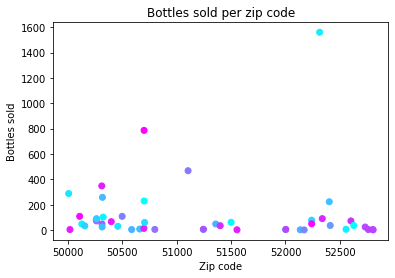

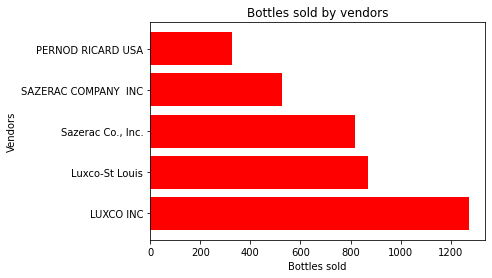

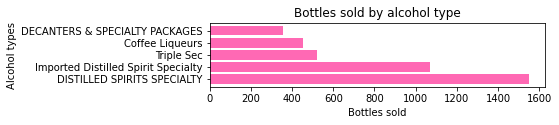

In [19]:
#Let's visually represent these results
"""In order to work as a scattergraph, I will give up the store_name, 
as it's not that important at this moment for the zip-code dependant analysis"""
pop_items = df.groupby('zip_code')['bottles_sold'].sum()

colors = np.random.randint(100, size=(47))

plt.scatter(pop_items.index, pop_items, c=colors, cmap = 'cool')
plt.title('Bottles sold per zip code')
plt.xlabel('Zip code')
plt.ylabel('Bottles sold')

plt.show()

#Now to create a bar chart regarding the performance of the top 5 best selling vendors

plt.barh(pop_vendors.head(5).index, pop_vendors.head(5), color = 'red')
plt.title('Bottles sold by vendors')
plt.xlabel('Bottles sold', fontsize = 10)
plt.ylabel('Vendors')

plt.show()

#Now to create a bar chart regarding the performance of the top 5 best selling alcohol types
plt.subplot(3, 1, 3)
plt.barh(pop_alcohols.head(5).index, pop_alcohols.head(5), color = 'hotpink')
plt.title('Bottles sold by alcohol type')
plt.xlabel('Bottles sold', fontsize = 10)
plt.ylabel('Alcohol types')

plt.show()

**This next few lines of code will give us the percentage of the total sales by each store**


In [20]:
#First, we take a look at the sales by each store
stores_sales = df.groupby('store_number')['bottles_sold'].size()
stores_sales

store_number
2178    1
2465    1
2512    2
2515    2
2522    1
2538    1
2544    1
2562    1
2571    2
2576    1
2587    1
2591    1
2593    2
2601    1
2616    1
2619    1
2633    3
2636    1
2641    1
2643    1
2647    1
2665    1
2670    1
2843    1
3162    1
3385    1
3447    3
3494    1
3524    1
3549    1
3705    1
3772    2
3869    1
3963    1
3993    2
4057    1
4136    1
4152    1
4153    1
4156    1
4158    1
4167    1
4291    1
4312    1
4559    1
4829    3
4867    1
4898    1
4962    1
4971    1
5003    1
5063    1
5102    2
5113    1
5146    1
5166    1
5204    1
5244    1
5416    1
5446    1
9001    1
Name: bottles_sold, dtype: int64

- we can see that some store_numbers appear more than once on a list, so we would like to see the sale scores for each appearance of the store, thus using the invoice 

In [21]:
stores_sales = df.groupby(['store_number','invoice_and_item_number'])['bottles_sold'].sum()
stores_sales

store_number  invoice_and_item_number
2178          INV-16882100032              1
2465          INV-02880700047              5
2512          INV-11928300062             60
              S30984900084                18
2515          INV-23393500001             48
              INV-23879500055             18
2522          INV-05775700006             48
2538          INV-05445500002             18
2544          INV-16481100198              6
2562          S30506300012               108
2571          INV-18227900139              1
              S33151100001               180
2576          S33457600258                 4
2587          S30696800117                48
2591          INV-11935900110              4
2593          INV-19169000013             12
              INV-24096400014             18
2601          INV-23548800092              6
2616          INV-05901900145             24
2619          S33584700201                90
2633          INV-05679500136             72
              INV

- this result can be used to describe the performance of each store, but at the moment we are focused to represent them percentually

In [22]:
#This being said(this step was somewhat difficult, but in the end I managed to obtain the percentages):
percentage = df.groupby(['store_number'])\
.agg({'bottles_sold' : "sum"})[['bottles_sold']]\
.apply(lambda x: 100*x/x.sum())\
.sort_values(by='bottles_sold', ascending=False)
percentage

,bottles_sold
store_number,
5102,27.684117
3494,13.629104
3447,8.305235
4829,5.323869
3524,5.110914
2633,4.578527
3385,3.833185
2571,3.212067
4136,1.916593


- We can clearly state that store_number 5102 produced more than a quarter of the sales and store_number 2178 should quickly change their management style

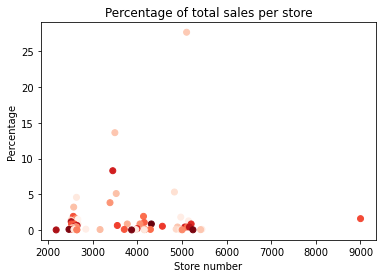

In [23]:
#Let's plot this result
colors = np.random.randint(100, size=(61))
plt.scatter(percentage.index, percentage, c=colors, cmap = 'Reds')
plt.title('Percentage of total sales per store')
plt.xlabel('Store number')
plt.ylabel('Percentage')


plt.show()


**Now that the work in python is done, let's head over to Tableau to creat a good looking dashboard of this data!**

In [24]:
#First let's creat a new .csv with the changes in our data
#df.to_csv('LiquoreSales2016_2019.csv')

**The Tableau Dashboard representation of the sales of this Liquor Business**

- Overview of the Dashboard, where in the top left corner one can see a map of all the selling points (increase in dimension with the increase in number of sales
- Top right shows the number of sales for each vendor, whereas bottom left shows the number of sales by alcohol category name and description of the item
- Bottom left is a simple bubblechart with the percentage of total sales by each store (store number in this case)

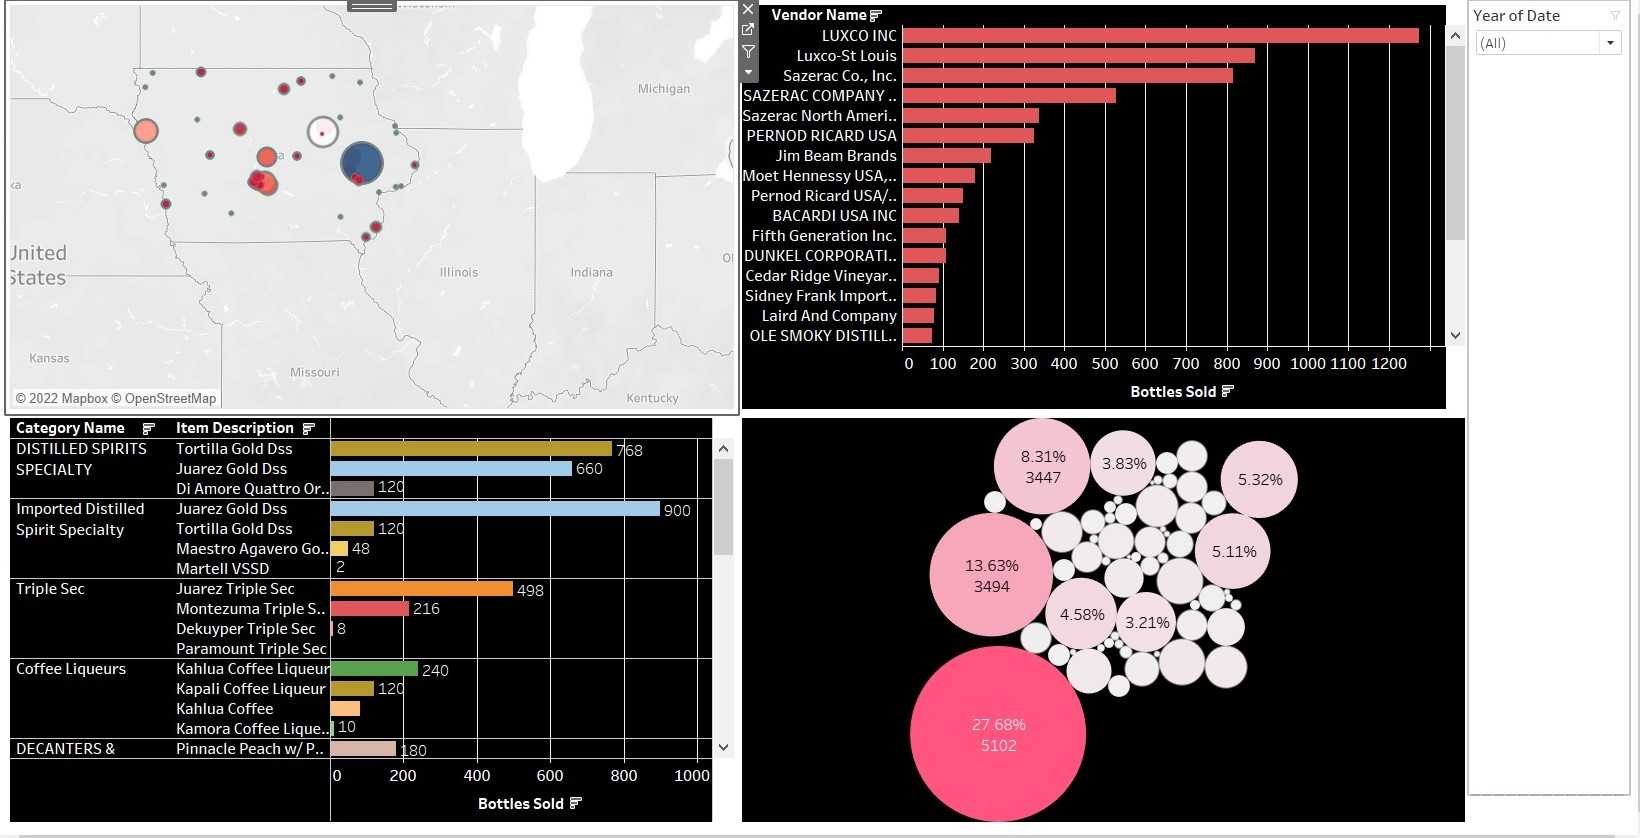

- The Dashboard is filtered by the year of business activity (2016-2019)

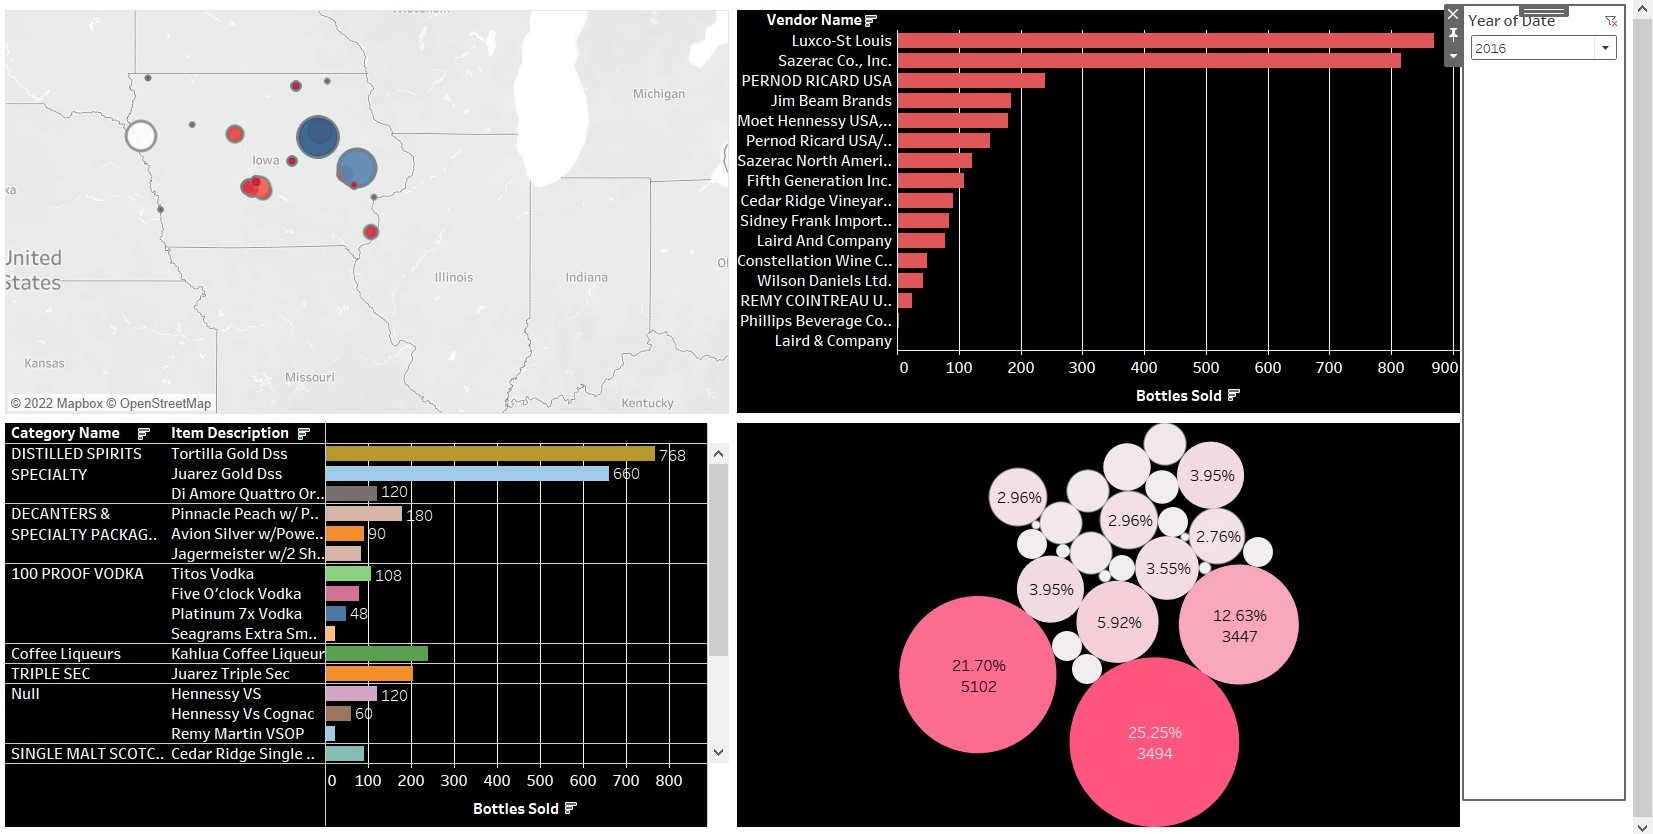

- Finally there are actions available on the Dashboard to filter even better the results

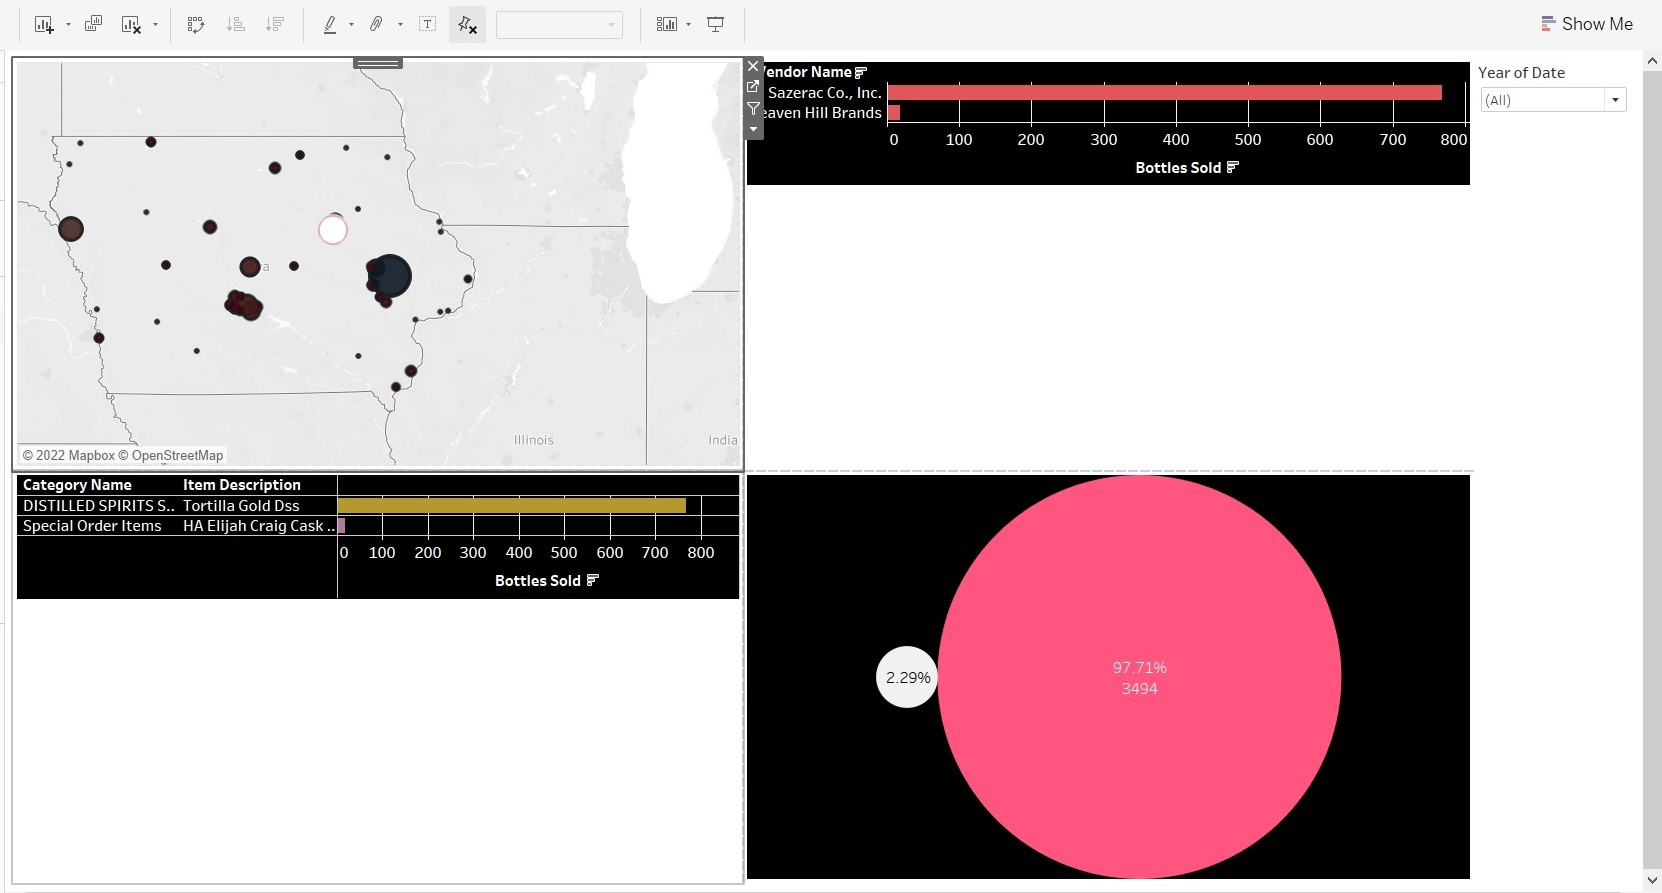

Here is the link available to this Dashboard - https://public.tableau.com/app/profile/markus.zetes/viz/LiquorStoreProject/Dashboard1?publish=yes

# I hope you enjoyed this short analysis of the Liquor Store Sales Performance as it is my first Data Analysis Project :)